In [ ]:
Dfrom google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importar las librerías necesarias
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import seaborn as sns
import numpy as np


# Leer el archivo CSV
df_bbdd = pd.read_csv('/content/drive/MyDrive/datasets/datos_bbdd.csv')

In [ ]:
df_bbdd

,area,temp,hum,fecha,hora
0,1,20.16,60.44,3/7/2024,08:54:46
1,2,20.13,61.94,3/7/2024,09:06:25
2,2,19.40,65.96,3/7/2024,09:13:33
3,1,20.89,60.60,3/7/2024,09:22:10
4,1,20.57,56.71,3/7/2024,09:32:08
...,...,...,...,...,...
8923,2,20.17,51.32,31/7/2024,20:57:49
8924,2,20.09,52.01,31/7/2024,21:38:06
8925,2,20.08,53.92,31/7/2024,22:48:26
8926,2,20.14,54.03,31/7/2024,23:18:48


In [ ]:
df_bbdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    8928 non-null   int64  
 1   temp    8928 non-null   float64
 2   hum     8928 non-null   float64
 3   fecha   8928 non-null   object 
 4   hora    8928 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 348.9+ KB


In [ ]:
# Convertir la columna 'fecha' a datetime
df_bbdd['fecha'] = pd.to_datetime(df_bbdd['fecha'], dayfirst=True, errors='coerce')

# Extraer solo la fecha (sin la hora)
df_bbdd['fecha_sin_hora'] = df_bbdd['fecha'].dt.date

# Verificar si las fechas están correctamente convertidas
print(df_bbdd[['fecha', 'fecha_sin_hora']].head())

       fecha fecha_sin_hora
0 2024-07-03     2024-07-03
1 2024-07-03     2024-07-03
2 2024-07-03     2024-07-03
3 2024-07-03     2024-07-03
4 2024-07-03     2024-07-03


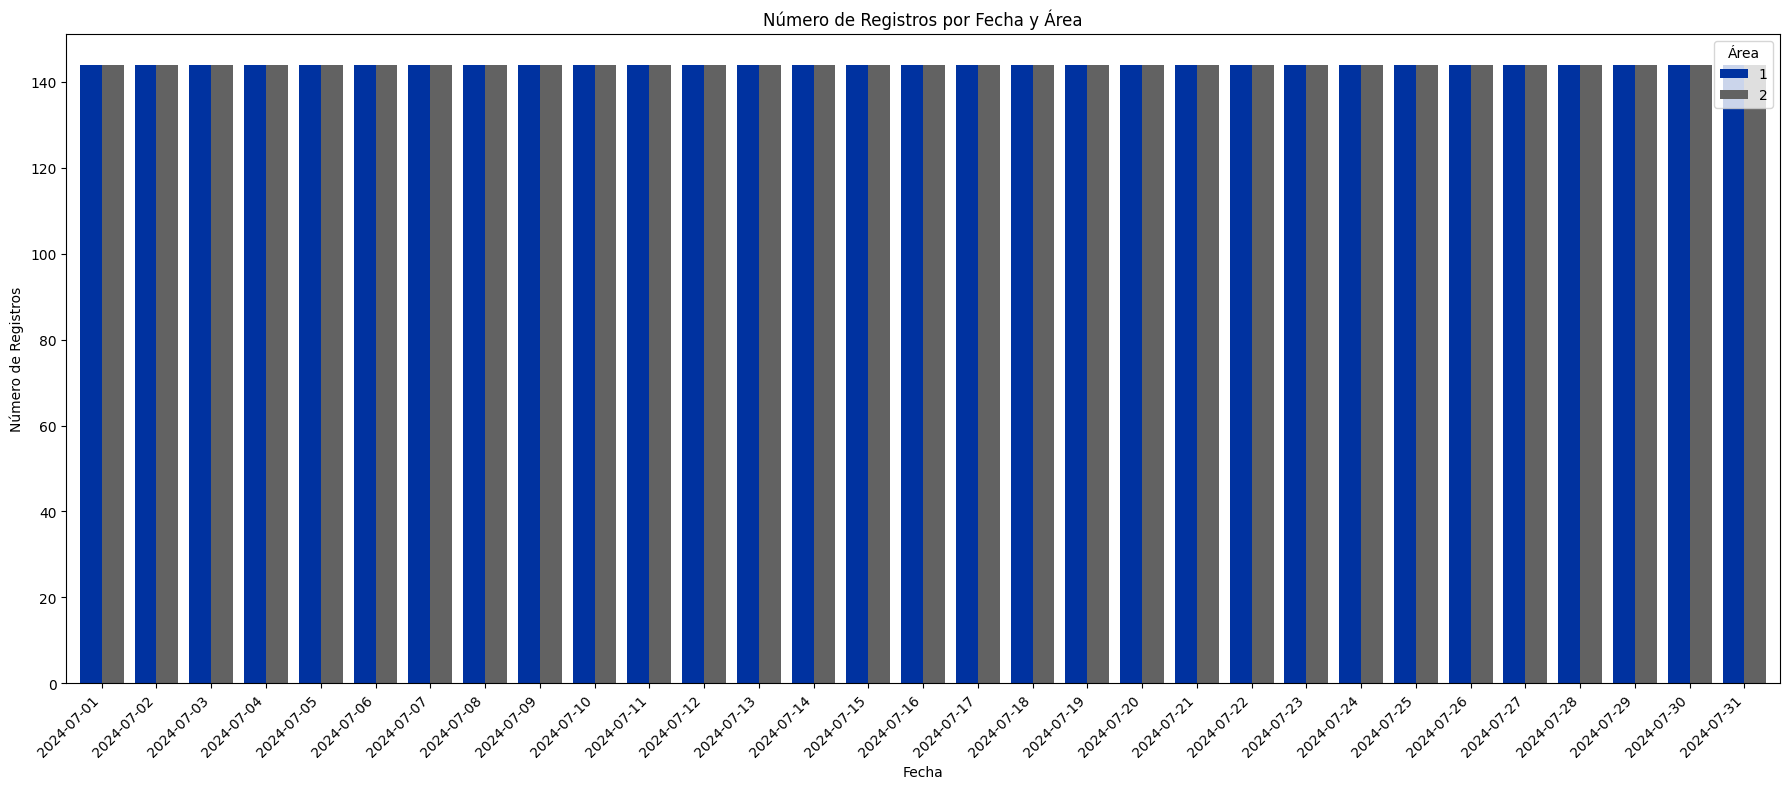

In [ ]:
# Agrupar por fecha_sin_hora y área, y contar los registros
grouped_data = df_bbdd.groupby(['fecha_sin_hora', 'area']).size().unstack(fill_value=0)

# Crear la gráfica de barras
fig, ax = plt.subplots(figsize=(18, 8))

# Gráfico de barras agrupadas
grouped_data.plot(kind='bar', ax=ax, width=0.8, color=['#0032A0', '#626262'])

# Asegurarse de que las etiquetas del eje X estén correctamente alineadas y mostrar solo la fecha
ax.set_xticklabels(grouped_data.index, rotation=45, ha='right')

plt.xlabel('Fecha')
plt.ylabel('Número de Registros')
plt.title('Número de Registros por Fecha y Área')
plt.legend(title='Área')
plt.tight_layout()
plt.show()


In [ ]:
# Generar una tabla con cantidad de datos por fecha ordenada
grouped_data_sorted = grouped_data.sort_index()
print("\nTabla ordenada por fecha:")
print(grouped_data_sorted)


Tabla ordenada por fecha:
area              1    2
fecha_sin_hora          
2024-07-01      144  144
2024-07-02      144  144
2024-07-03      144  144
2024-07-04      144  144
2024-07-05      144  144
2024-07-06      144  144
2024-07-07      144  144
2024-07-08      144  144
2024-07-09      144  144
2024-07-10      144  144
2024-07-11      144  144
2024-07-12      144  144
2024-07-13      144  144
2024-07-14      144  144
2024-07-15      144  144
2024-07-16      144  144
2024-07-17      144  144
2024-07-18      144  144
2024-07-19      144  144
2024-07-20      144  144
2024-07-21      144  144
2024-07-22      144  144
2024-07-23      144  144
2024-07-24      144  144
2024-07-25      144  144
2024-07-26      144  144
2024-07-27      144  144
2024-07-28      144  144
2024-07-29      144  144
2024-07-30      144  144
2024-07-31      144  144
